In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline



## Challenge 1

In [16]:
df = pd.DataFrame({'Intercept': np.ones(999), 'Data' : np.arange(1,1000,1)})

X = np.arange(1,1000,1)
y = np.ones(len(r))
for i in range(len(r)):
    epsilon = np.random.randn()
    y[i] = 2*np.log(X[i]) + epsilon

df.head()

,Data,Intercept
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


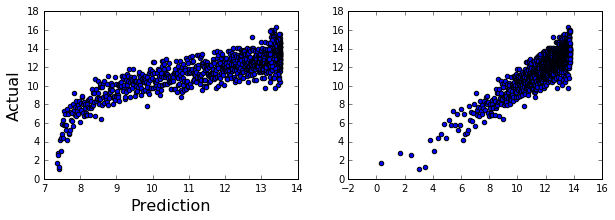

In [22]:
from sklearn.linear_model import LinearRegression

df['Log_Data'] = np.log(df['Data'])
df['Squared_Data'] = df['Data']**2

X1 = np.array(df[['Intercept','Data','Squared_Data']])

model1 = LinearRegression()
results1 = model1.fit(X1,y)

X2 = np.array(df[['Intercept','Log_Data']])

model2 = LinearRegression()
results2 = model2.fit(X2,y)

plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.scatter(model1.predict(X1),y)
plt.title('  ', fontsize = 20)
plt.xlabel('Prediction', fontsize=16)
plt.ylabel('Actual', fontsize=16)

plt.subplot(1,2,2)
plt.scatter(model2.predict(X2),y)

## Challenge 2

In [31]:
from sklearn.metrics import mean_squared_error as mse

y2 = np.ones(len(r))
for i in range(len(r)):
    epsilon = np.random.randn()
    y2[i] = 2*(X[i])**2 + 3*(X[i])+ epsilon

X3_train = np.array(df[['Intercept','Data','Squared_Data']][:750])
X3_test = np.array(df[['Intercept','Data','Squared_Data']][750:])

model3 = LinearRegression()
results3 = model3.fit(X3_train,y2[:750])

error_train = mse(y2[:750],model3.predict(X3_train))
error_test = mse(y2[750:],model3.predict(X3_test))

## Challenge 3

In [38]:
x = pd.DataFrame()
training_error = []
test_error = []
r_squared = []
for i in range(0,8,1):
    x[str(i)] = X ** i
    model = LinearRegression()
    results = model.fit(np.array(x[:750]),y2[:750])
    training_error.append(mse(y2[:750],model.predict(x[:750])))
    test_error.append(mse(y2[750:],model.predict(x[750:])))
    r_squared.append(model.score(x[750:],y2[750:]))
    

    

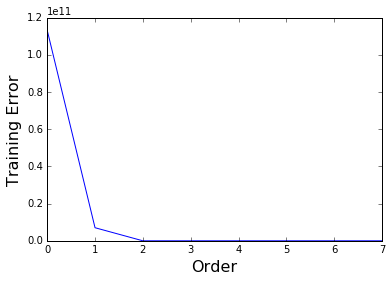

In [43]:
r = range(0,8,1)

plt.plot(r,training_error)
plt.title('  ', fontsize = 20)
plt.xlabel('Order', fontsize=16)
plt.ylabel('Training Error', fontsize=16)

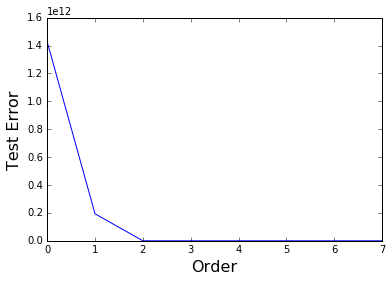

In [44]:
plt.plot(r,test_error)
plt.title('  ', fontsize = 20)
plt.xlabel('Order', fontsize=16)
plt.ylabel('Test Error', fontsize=16)

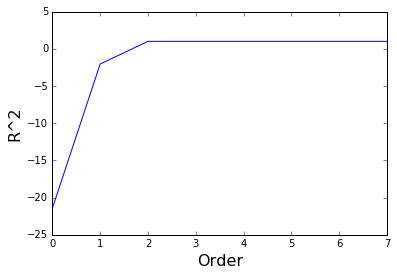

In [45]:
plt.plot(r,r_squared)
plt.title('  ', fontsize = 20)
plt.xlabel('Order', fontsize=16)
plt.ylabel('R^2', fontsize=16)

## Challenge 4

In [46]:
X = np.array(df[['Intercept','Data','Squared_Data']])

e_train = []
e_test =  []
r = range(5,1000,5)
for i in range(5,1000,5):
    model3 = LinearRegression()
    results3 = model3.fit(X[:i],y2[:i])

    error_train = mse(y2[:i],model3.predict(X[:i]))
    error_test = mse(y2[i:],model3.predict(X[i:]))
    
    e_train.append(error_train)
    e_test.append(error_test)
    
    

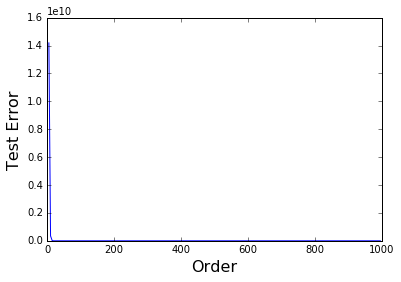

In [47]:
plt.plot(r,e_test)
plt.title('  ', fontsize = 20)
plt.xlabel('Order', fontsize=16)
plt.ylabel('Test Error', fontsize=16)

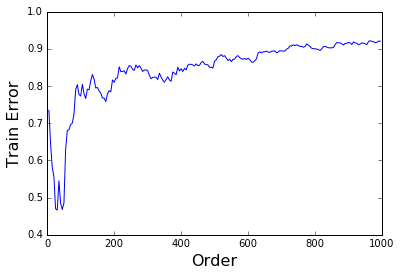

In [48]:
plt.plot(r,e_train)
plt.title('  ', fontsize = 20)
plt.xlabel('Order', fontsize=16)
plt.ylabel('Train Error', fontsize=16)